# A Geometric Intuition for Linear Discrminant Analysis

This notebook supplements the article at https://omarshehata.github.io/lda-explorable/. 

It's provided as a reference for performing LDA in Python.

In [0]:
# Import the libraries we need
import numpy as np
import pandas as pd
from numpy.linalg import matrix_rank
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Peform LDA on the 2D case. First we load the same data used in the article from the GitHub repository.

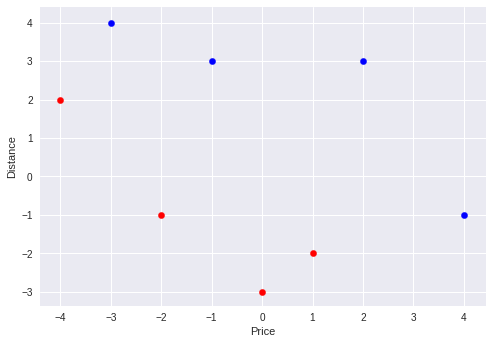

In [2]:
data_url = 'https://omarshehata.github.io/lda-explorable/data/sample-2d.csv'
data = pd.read_csv(data_url)

# Flip the Y to match the JavaScript graph 
data['Distance'] = -data['Distance']

ax = data[data['class'] == 0].plot.scatter(x='Price', y='Distance', c='red', s=40);
ax = data[data['class'] == 1].plot.scatter(x='Price', y='Distance', c='blue', s=40,ax=ax);

Now we perform LDA and reduce the data down to 1 dimension.

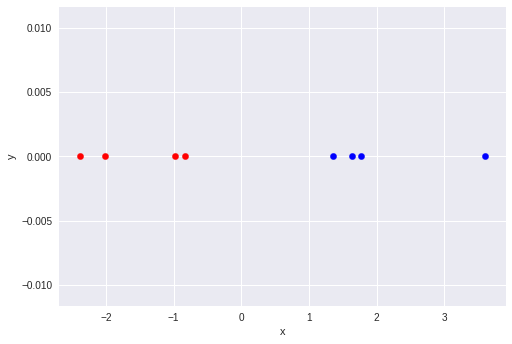

In [3]:
# Initialize the LDA to reduce to 1 dimension
LDA = LinearDiscriminantAnalysis(n_components=1, solver='eigen')
# Separate the data and class 
Features = data.loc[:,'Price':'Distance'].values
Classes = data['class']
# Find the best projection 
ProjectedData = LDA.fit_transform(Features, Classes)
# Put it in a dataframe and plot it
n = ProjectedData.shape[0]
newData = pd.DataFrame(data={
    'class' : Classes,
    'x' : ProjectedData.reshape(n),
    'y' : np.zeros(n)
})

ax = newData[newData['class'] == 0].plot.scatter(x='x', y='y', c='red', s=40);
ax = newData[newData['class'] == 1].plot.scatter(x='x', y='y', c='blue', s=40,ax=ax);

LDA for the 3D case.

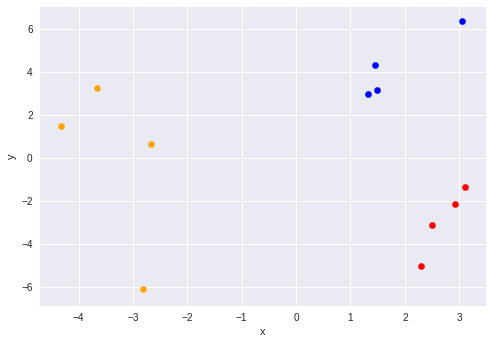

In [4]:
# Load the same data in the article
data_url = 'https://omarshehata.github.io/lda-explorable/data/sample-3d.csv'
data = pd.read_csv(data_url)
# Initialize LDA to project to 2 dimensions
LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen')

Features = data.loc[:,'X':'Z'].values
Classes = data['class']

ProjectedData = LDA.fit_transform(Features, Classes)

# Put it in a data frame and plot it
n = ProjectedData.shape[0]
newData = pd.DataFrame(data={
    'class' : Classes,
    'x' : np.zeros(n),
    'y' : np.zeros(n)
})
newData.loc[:,'x':'y'] = ProjectedData

ax = newData[newData['class'] == 0].plot.scatter(x='x', y='y', c='red', s=40);
ax = newData[newData['class'] == 1].plot.scatter(x='x', y='y', c='blue', s=40,ax=ax);
ax = newData[newData['class'] == 2].plot.scatter(x='x', y='y', c='orange', s=40,ax=ax);

LDA in 4D.

In [0]:
data_url = 'https://omarshehata.github.io/lda-explorable/data/sample-4d.csv'
data = pd.read_csv(data_url)

LDA = LinearDiscriminantAnalysis(n_components=2, solver='eigen')

Features = data.loc[:,'X':'W'].values
Classes = data['class']

# Try this one yourself. The 3D case is the closest example. 
# 1 - Run the fit_transform function to get the projected data
# 2 - Put it in a data frame 
# 3 - Plot it in 2D
# 4 - Can you find this same projection back in the diagram in the article?